### This Notebook Goes over how to reproduce the Brain Age Prediction used in our paper

In [33]:
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error as mae

In [2]:
os.chdir("/home/lajoyce/Documents/BayesAge2.0")

In [3]:
import BayesAge2

In [4]:
from BayesAge2 import transcriptome_reference

### Import Tabula Muris Senis dataset

In [5]:
df = pd.read_csv("MACA_modified_rawcounts.csv")

df.head(10)

,Unnamed: 0,Brain_47-m-18,GAT_39-f-1,Lung_6-f-12,Limb_Muscle_11-m-3,WBC_34-f-9,Small_Intestine_46-m-12,Limb_Muscle_38-m-9,Liver_56-m-6,Lung_17-f-12,...,Spleen_25-m-9,Pancreas_14-m-27,BAT_27-f-6,Kidney_7-m-15,Brain_8-f-12,Brain_22-m-15,WBC_44-f-12,WBC_29-m-9,Spleen_33-f-1,WBC_23-m-3
0,ENSMUSG00000109644,8,29,5,6,3,477,4,2494,7,...,19,7,5,1004,8,16,5,1,9,0
1,ENSMUSG00000007777,118,269,117,209,2,215,96,214,91,...,49,29,1118,136,178,161,3,10,112,2
2,ENSMUSG00000043644,17,40,21,148,9,12,88,12,42,...,24,0,36,14,15,16,15,15,33,7
3,ENSMUSG00000042208,546,570,291,259,41,93,195,327,230,...,152,49,1853,79,657,781,11,17,265,5
4,ENSMUSG00000020831,39,113,40,19,8,14,9,21,33,...,75,11,56,27,56,76,1,4,83,0
5,ENSMUSG00000107002,284,488,204,635,31,537,475,346,183,...,235,88,3577,297,489,577,23,26,347,18
6,ENSMUSG00000058706,10,87,40,24,21,40,25,144,59,...,46,14,85,22,32,27,6,6,141,0
7,ENSMUSG00000099146,18,0,9,0,3,2,3,630,8,...,3,1,0,68,8,7,0,0,3,0
8,ENSMUSG00000028608,419,532,471,222,78,193,190,193,510,...,432,103,916,162,669,647,27,40,651,16
9,ENSMUSG00000097882,19,44,13,30,0,0,14,1,29,...,25,9,6,11,32,16,0,1,20,1


In [6]:
df.rename(columns={"Unnamed: 0": "Gene"}, inplace=True)

In [7]:
df.set_index("Gene", inplace=True)

In [8]:
df = df.T

In [9]:
df_metadata = pd.read_csv("MACA_modified_metadata.csv")

df_metadata.head(1)

,Unnamed: 0,Sample.name,title,source.name,organism,characteristics..age,characteristics..developmental.stage,characteristics..sex,molecule,description,processed.data.file,raw.file,BioSample,Instrument.Model,Sample.name.new
0,A1_384Bulk_Plate1_S1,A1_384Bulk_Plate1_S1,Tabula Muris Senis (bulk RNA seq),BAT_24,Mus musculus C57/BL6,6,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127205,SAMN11854566,Illumina NovaSeq 6000,BAT_24-m-6


In [10]:
df_metadata.set_index("Sample.name.new", inplace=True)

In [11]:
df_new_metadata = df_metadata.loc[df.index.tolist(), ]

df_new_metadata.head(5)

,Unnamed: 0,Sample.name,title,source.name,organism,characteristics..age,characteristics..developmental.stage,characteristics..sex,molecule,description,processed.data.file,raw.file,BioSample,Instrument.Model
Sample.name.new,,,,,,,,,,,,,,
Brain_47-m-18,A10_384Bulk_Plate1_S10,A10_384Bulk_Plate1_S10,Tabula Muris Senis (bulk RNA seq),Brain_47,Mus musculus C57/BL6,18,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127203,SAMN11854568,Illumina NovaSeq 6000
GAT_39-f-1,A10_384Bulk_Plate2_S10,A10_384Bulk_Plate2_S10,Tabula Muris Senis (bulk RNA seq),GAT_39,Mus musculus C57/BL6,1,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127204,SAMN11854569,Illumina NovaSeq 6000
Lung_6-f-12,A10_384Bulk_Plate3_S10,A10_384Bulk_Plate3_S10,Tabula Muris Senis (bulk RNA seq),Lung_6,Mus musculus C57/BL6,12,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127371,SAMN11854570,Illumina NovaSeq 6000
Limb_Muscle_11-m-3,A11_384Bulk_Plate1_S11,A11_384Bulk_Plate1_S11,Tabula Muris Senis (bulk RNA seq),Limb_Muscle_11,Mus musculus C57/BL6,3,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127373,SAMN11854571,Illumina NovaSeq 6000
WBC_34-f-9,A11_384Bulk_Plate2_S11,A11_384Bulk_Plate2_S11,Tabula Muris Senis (bulk RNA seq),WBC_34,Mus musculus C57/BL6,9,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127107,SAMN11854572,Illumina NovaSeq 6000


# Brain

In [12]:
brain_df_metadata = df_new_metadata.loc[df_new_metadata["source.name"].str.startswith("Brain")]

brain_df_metadata.head(3)

,Unnamed: 0,Sample.name,title,source.name,organism,characteristics..age,characteristics..developmental.stage,characteristics..sex,molecule,description,processed.data.file,raw.file,BioSample,Instrument.Model
Sample.name.new,,,,,,,,,,,,,,
Brain_47-m-18,A10_384Bulk_Plate1_S10,A10_384Bulk_Plate1_S10,Tabula Muris Senis (bulk RNA seq),Brain_47,Mus musculus C57/BL6,18,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127203,SAMN11854568,Illumina NovaSeq 6000
Brain_51-f-18,A13_384Bulk_Plate3_S13,A13_384Bulk_Plate3_S13,Tabula Muris Senis (bulk RNA seq),Brain_51,Mus musculus C57/BL6,18,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127027,SAMN11854579,Illumina NovaSeq 6000
Brain_20-f-21,A18_384Bulk_Plate1_S18,A18_384Bulk_Plate1_S18,Tabula Muris Senis (bulk RNA seq),Brain_20,Mus musculus C57/BL6,21,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127073,SAMN11854589,Illumina NovaSeq 6000


In [13]:
brain_df_counts = df.loc[brain_df_metadata.index.tolist(),]

brain_df_counts.head(3)

Gene,ENSMUSG00000109644,ENSMUSG00000007777,ENSMUSG00000043644,ENSMUSG00000042208,ENSMUSG00000020831,ENSMUSG00000107002,ENSMUSG00000058706,ENSMUSG00000099146,ENSMUSG00000028608,ENSMUSG00000097882,...,ENSMUSG00000096015,ENSMUSG00000096037,ENSMUSG00000095183,ENSMUSG00000094760,ENSMUSG00000095749,ENSMUSG00000094657,ENSMUSG00000095645,ENSMUSG00000096765,ENSMUSG00000096170,ENSMUSG00000095453
Brain_47-m-18,8,118,17,546,39,284,10,18,419,19,...,0,0,0,0,0,0,0,0,0,0
Brain_51-f-18,8,67,11,251,26,199,9,1,232,9,...,0,0,0,0,0,0,0,0,0,0
Brain_20-f-21,9,138,19,640,56,381,12,18,482,23,...,0,0,0,0,0,0,0,0,0,0


In [14]:
brain_df_age = brain_df_counts.copy()

In [15]:
brain_df_age["age"] = pd.to_numeric(brain_df_metadata["characteristics..age"].tolist(), errors="coerce")

In [16]:
brain_df_age.head(5)

Gene,ENSMUSG00000109644,ENSMUSG00000007777,ENSMUSG00000043644,ENSMUSG00000042208,ENSMUSG00000020831,ENSMUSG00000107002,ENSMUSG00000058706,ENSMUSG00000099146,ENSMUSG00000028608,ENSMUSG00000097882,...,ENSMUSG00000096037,ENSMUSG00000095183,ENSMUSG00000094760,ENSMUSG00000095749,ENSMUSG00000094657,ENSMUSG00000095645,ENSMUSG00000096765,ENSMUSG00000096170,ENSMUSG00000095453,age
Brain_47-m-18,8,118,17,546,39,284,10,18,419,19,...,0,0,0,0,0,0,0,0,0,18
Brain_51-f-18,8,67,11,251,26,199,9,1,232,9,...,0,0,0,0,0,0,0,0,0,18
Brain_20-f-21,9,138,19,640,56,381,12,18,482,23,...,0,0,0,0,0,0,0,0,0,21
Brain_39-m-12,22,133,23,593,71,395,4,17,439,12,...,0,0,0,0,0,0,0,0,0,12
Brain_4-m-3,11,148,23,907,44,451,28,6,577,7,...,0,0,0,0,0,0,0,0,0,3


# Construct the reference training matrix using the transcriptome_reference function (LOOCV)

In [17]:
brain_df_age["age"].value_counts()

age
18    6
21    6
12    6
3     6
6     6
1     6
9     5
15    5
24    4
27    3
Name: count, dtype: int64

In [18]:
brain_df_age["age"].value_counts().index.tolist()

[18, 21, 12, 3, 6, 1, 9, 15, 24, 27]

In [19]:
sorted(brain_df_age["age"].value_counts().index.tolist())

[1, 3, 6, 9, 12, 15, 18, 21, 24, 27]

#### Here we are implementing a leave one out strategy for cross validation purposes

In [20]:
#for sample in brain_df_age.index.tolist():

#    new_df = brain_df_age.drop(sample)

#    new_df.to_csv(f"/home/lajoyce/Documents/BayesAge2.0/brain/loocv_sample/brain_sample_{sample}.csv", sep="\t")

#    print(new_df.shape)

#### Reference Matrix Construction

In [21]:
#counter = 0

#for sample in brain_df_age.index.tolist():

#    transcriptome_reference(training_matrix=f"/home/lajoyce/Documents/BayesAge2.0/brain/loocv_sample/brain_sample_{sample}.csv",
#                            reference_name=f"brain_reference_{sample}.csv",
#                            output_path="/home/lajoyce/Documents/BayesAge2.0/brain/reference/",
#                            age_prediction="list",
#                            age_list=[1, 3, 6, 9, 12, 15, 18, 21, 24, 27],
#                            min_age=1,
#                            max_age=24,
#                            age_step=1,
#                            tau=0.7)
    
#    counter += 1

#    print(counter)

# Brain Age Prediction

In [22]:
from BayesAge2 import pdAge

In [23]:
counter = 0

for sample in brain_df_age.index.tolist():
    pdAge(prediction_matrix=f"/home/lajoyce/Documents/BayesAge2.0/brain/test/{sample}.csv",
    sample_name=f"{sample}",
    reference_data=f"/home/lajoyce/Documents/BayesAge2.0/brain/reference/brain_reference_{sample}",
    output_path="/home/lajoyce/Documents/BayesAge2.0/brain/predictions/",
    selection_mode="numGenes",
    gene_parameter=12,
    age_prediction="list",
    age_list = [1, 3, 6, 9, 12, 15, 18, 21, 24, 27],
    min_age=0,
    max_age=100,
    age_step=1,
    n_cores=1,
    chunksize=5)
    counter += 1

print(counter)
    

pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_47-m-18' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_47-m-18.csv'...
Number of samples: 1
Brain_47-m-18

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_47-m-18
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.091 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_51-f-18' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_51-f-18.csv'...
Number of samples: 1
Brain_51-f-18

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_51-f-18
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.297 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_20-f-21' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_20-f-21.csv'...
Number of samples: 1
Brain_20-f-21

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_20-f-21
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.300 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_39-m-12' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_39-m-12.csv'...
Number of samples: 1
Brain_39-m-12

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_39-m-12
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.383 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_4-m-3' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_4-m-3.csv'...
Number of samples: 1
Brain_4-m-3

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_4-m-3
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.388 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_5-m-9' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_5-m-9.csv'...
Number of samples: 1
Brain_5-m-9

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_5-m-9
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.238 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_24-f-9' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_24-f-9.csv'...
Number of samples: 1
Brain_24-f-9

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_24-f-9
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.362 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_40-m-6' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_40-m-6.csv'...
Number of samples: 1
Brain_40-m-6

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_40-m-6
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.301 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_17-m-3' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_17-m-3.csv'...
Number of samples: 1
Brain_17-m-3

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_17-m-3
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.034 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_6-m-9' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_6-m-9.csv'...
Number of samples: 1
Brain_6-m-9

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_6-m-9
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.375 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_16-m-1' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_16-m-1.csv'...
Number of samples: 1
Brain_16-m-1

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_16-m-1
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.109 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_52-f-18' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_52-f-18.csv'...
Number of samples: 1
Brain_52-f-18

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_52-f-18
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.339 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_30-m-21' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_30-m-21.csv'...
Number of samples: 1
Brain_30-m-21

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_30-m-21
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.378 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_35-m-3' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_35-m-3.csv'...
Number of samples: 1
Brain_35-m-3

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_35-m-3
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.339 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_43-m-21' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_43-m-21.csv'...
Number of samples: 1
Brain_43-m-21

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_43-m-21
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.383 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_14-m-12' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_14-m-12.csv'...
Number of samples: 1
Brain_14-m-12

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_14-m-12
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.221 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_34-f-3' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_34-f-3.csv'...
Number of samples: 1
Brain_34-f-3

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_34-f-3
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.298 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_1-m-21' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_1-m-21.csv'...
Number of samples: 1
Brain_1-m-21

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_1-m-21
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.411 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_53-m-9' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_53-m-9.csv'...
Number of samples: 1
Brain_53-m-9

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_53-m-9
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.315 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_50-f-3' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_50-f-3.csv'...
Number of samples: 1
Brain_50-f-3

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_50-f-3
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.307 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_44-m-18' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_44-m-18.csv'...
Number of samples: 1
Brain_44-m-18

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_44-m-18
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.293 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_21-m-15' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_21-m-15.csv'...
Number of samples: 1
Brain_21-m-15

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_21-m-15
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.264 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_28-f-1' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_28-f-1.csv'...
Number of samples: 1
Brain_28-f-1

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_28-f-1
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.356 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_25-m-6' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_25-m-6.csv'...
Number of samples: 1
Brain_25-m-6

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_25-m-6
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.362 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_19-f-1' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_19-f-1.csv'...
Number of samples: 1
Brain_19-f-1

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_19-f-1
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.370 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_23-m-24' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_23-m-24.csv'...
Number of samples: 1
Brain_23-m-24

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_23-m-24
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.315 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_56-m-3' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_56-m-3.csv'...
Number of samples: 1
Brain_56-m-3

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_56-m-3
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.381 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_45-m-6' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_45-m-6.csv'...
Number of samples: 1
Brain_45-m-6

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_45-m-6
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.359 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_49-m-6' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_49-m-6.csv'...
Number of samples: 1
Brain_49-m-6

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_49-m-6
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.334 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_15-m-12' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_15-m-12.csv'...
Number of samples: 1
Brain_15-m-12

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_15-m-12
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.223 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_18-f-6' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_18-f-6.csv'...
Number of samples: 1
Brain_18-f-6

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_18-f-6
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.170 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_7-m-1' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_7-m-1.csv'...
Number of samples: 1
Brain_7-m-1

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_7-m-1
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.397 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_54-m-24' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_54-m-24.csv'...
Number of samples: 1
Brain_54-m-24

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_54-m-24
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.357 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_26-m-27' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_26-m-27.csv'...
Number of samples: 1
Brain_26-m-27

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_26-m-27
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.367 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_48-m-12' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_48-m-12.csv'...
Number of samples: 1
Brain_48-m-12

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_48-m-12
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.020 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_36-m-24' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_36-m-24.csv'...
Number of samples: 1
Brain_36-m-24

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_36-m-24
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.357 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_13-m-9' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_13-m-9.csv'...
Number of samples: 1
Brain_13-m-9

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_13-m-9
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.107 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_46-m-24' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_46-m-24.csv'...
Number of samples: 1
Brain_46-m-24

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_46-m-24
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.362 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_42-f-15' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_42-f-15.csv'...
Number of samples: 1
Brain_42-f-15

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_42-f-15
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.217 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_37-m-27' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_37-m-27.csv'...
Number of samples: 1
Brain_37-m-27

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_37-m-27
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.353 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_31-f-6' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_31-f-6.csv'...
Number of samples: 1
Brain_31-f-6

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_31-f-6
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.474 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_11-m-21' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_11-m-21.csv'...
Number of samples: 1
Brain_11-m-21

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_11-m-21
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.391 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_27-m-15' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_27-m-15.csv'...
Number of samples: 1
Brain_27-m-15

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_27-m-15
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.119 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_10-m-18' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_10-m-18.csv'...
Number of samples: 1
Brain_10-m-18

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_10-m-18
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.118 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_41-m-15' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_41-m-15.csv'...
Number of samples: 1
Brain_41-m-15

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_41-m-15
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.408 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_38-f-12' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_38-f-12.csv'...
Number of samples: 1
Brain_38-f-12

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_38-f-12
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.403 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_12-f-21' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_12-f-21.csv'...
Number of samples: 1
Brain_12-f-21

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_12-f-21
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.395 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_2-m-1' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_2-m-1.csv'...
Number of samples: 1
Brain_2-m-1

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_2-m-1
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.375 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_3-m-1' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_3-m-1.csv'...
Number of samples: 1
Brain_3-m-1

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_3-m-1
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.367 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_55-m-18' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_55-m-18.csv'...
Number of samples: 1
Brain_55-m-18

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_55-m-18
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.430 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_9-m-27' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_9-m-27.csv'...
Number of samples: 1
Brain_9-m-27

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_9-m-27
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.283 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_8-f-12' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_8-f-12.csv'...
Number of samples: 1
Brain_8-f-12

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_8-f-12
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.462 seconds

pdAge run complete!
pdAge algorithm starting!

----------------------------------------
Profiling transcriptomic age in 'Brain_22-m-15' 
Loading sample file from '/home/lajoyce/Documents/BayesAge2.0/brain/test/Brain_22-m-15.csv'...
Number of samples: 1
Brain_22-m-15

pdAge parameters: 
-----------------------------------------------------------
Using reference training data: brain_reference_Brain_22-m-15
Minimum age: 1
Maximum age: 27
Using profiling mode: numGenes
Profiling top 12 age-related genes
------------------------------------------------------------------------
Starting parallel processing of all samples with 1 cores!



pdAge progress:   0%|          | 0/1 [00:00<?, ?Age predictions/s]




Predictions stored in '/home/lajoyce/Documents/BayesAge2.0/brain/predictions/'
------------------------------------------------------

Time elapsed to generate pdAge results = 1.381 seconds

pdAge run complete!
53


In [24]:
# Path to your prediction folder
prediction_folder = "/home/lajoyce/Documents/BayesAge2.0/brain/predictions/"

# Initialize an empty list to store DataFrames
dataframes_list = []

# Loop through each file in the folder
for file in os.listdir(prediction_folder):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(prediction_folder, file)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, sep="\t")  # Adjust delimiter as needed
        # Append the DataFrame to the list
        dataframes_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes_list, axis=0, ignore_index=True)

# Optionally, inspect the combined DataFrame
combined_df.head(5)

,Sample,Predicted Age,Ages Tested,Ages Likelihood,Selected Genes,Number of Genes,Correlations,Intersections
0,Brain_15-m-12,12.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1839.3556468053298, -1136.9172981466459, -51...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.961797304807395, 0.9270350979940448, 0.9146...",24616
1,Brain_18-f-6,9.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-609.9927120195388, -359.2289121546138, -154....","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9597802384861264, 0.9296529925812232, 0.919...",24616
2,Brain_10-m-18,15.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1509.2177066106854, -1019.180071630983, -554...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9590935776108012, 0.9251896968916076, 0.910...",24616
3,Brain_7-m-1,3.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-82.86527670719603, -79.58043818005747, -134....","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9622693841591812, 0.9220997229526434, 0.911...",24616
4,Brain_47-m-18,21.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1415.306721804937, -1070.7048409569416, -128...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.960981895017946, 0.925661776243394, 0.91016...",24616


In [25]:
combined_df.set_index("Sample", inplace=True)

In [26]:
combined_df.head(5)

,Predicted Age,Ages Tested,Ages Likelihood,Selected Genes,Number of Genes,Correlations,Intersections
Sample,,,,,,,
Brain_15-m-12,12.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1839.3556468053298, -1136.9172981466459, -51...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.961797304807395, 0.9270350979940448, 0.9146...",24616
Brain_18-f-6,9.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-609.9927120195388, -359.2289121546138, -154....","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9597802384861264, 0.9296529925812232, 0.919...",24616
Brain_10-m-18,15.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1509.2177066106854, -1019.180071630983, -554...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9590935776108012, 0.9251896968916076, 0.910...",24616
Brain_7-m-1,3.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-82.86527670719603, -79.58043818005747, -134....","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9622693841591812, 0.9220997229526434, 0.911...",24616
Brain_47-m-18,21.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1415.306721804937, -1070.7048409569416, -128...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.960981895017946, 0.925661776243394, 0.91016...",24616


In [27]:
ordered_combined_df = combined_df.loc[brain_df_age.index.tolist(),]

ordered_combined_df.head(5)

,Predicted Age,Ages Tested,Ages Likelihood,Selected Genes,Number of Genes,Correlations,Intersections
Sample,,,,,,,
Brain_47-m-18,21.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1415.306721804937, -1070.7048409569416, -128...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.960981895017946, 0.925661776243394, 0.91016...",24616
Brain_51-f-18,18.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-922.6741485157556, -658.4979825080067, -396....","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9590935776108012, 0.9242455381880352, 0.909...",24616
Brain_20-f-21,24.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-1823.4484174506536, -2193.367021580866, -156...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9601664852284972, 0.9242884544927432, 0.910...",24616
Brain_39-m-12,9.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-642.8493042333814, -374.25085256030786, -161...","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9618402211121028, 0.9251896968916076, 0.913...",24616
Brain_4-m-3,3.0,"[1.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 2...","[-184.97748546092356, -85.50821812409578, -89....","['ENSMUSG00000073418', 'ENSMUSG00000061232', '...",12,"[0.9605956482755756, 0.9227863838279688, 0.909...",24616


In [28]:
ordered_combined_df_subset = ordered_combined_df[["Predicted Age"]]

ordered_combined_df_subset.head(5)

,Predicted Age
Sample,
Brain_47-m-18,21.0
Brain_51-f-18,18.0
Brain_20-f-21,24.0
Brain_39-m-12,9.0
Brain_4-m-3,3.0


In [29]:
ordered_combined_df_subset["True Age"] = brain_df_age["age"].values.tolist()

ordered_combined_df_subset.head(5)

,Predicted Age,True Age
Sample,,
Brain_47-m-18,21.0,18
Brain_51-f-18,18.0,18
Brain_20-f-21,24.0,21
Brain_39-m-12,9.0,12
Brain_4-m-3,3.0,3


In [30]:
x = ordered_combined_df_subset["True Age"]
y = ordered_combined_df_subset["Predicted Age"]

model = sm.OLS(y, sm.add_constant(x))

results = model.fit()
print(results.params)
print(results.summary())

const       0.115164
True Age    0.986269
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Predicted Age   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     504.2
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           4.23e-28
Time:                        22:11:03   Log-Likelihood:                -124.47
No. Observations:                  53   AIC:                             252.9
Df Residuals:                      51   BIC:                             256.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

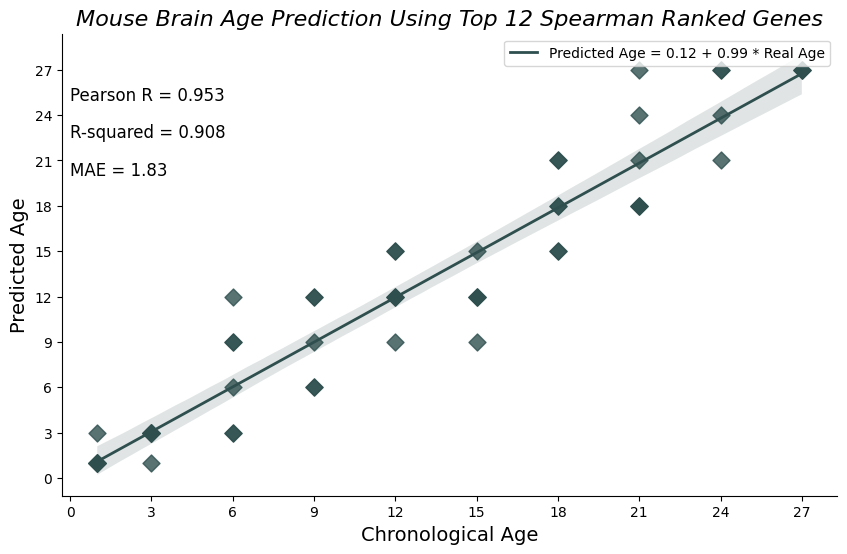

In [34]:
# Ensure the 'age' and 'prediction' columns are numeric
ordered_combined_df_subset['age'] = pd.to_numeric(ordered_combined_df_subset['True Age'], errors='coerce')
ordered_combined_df_subset['prediction'] = pd.to_numeric(ordered_combined_df_subset['Predicted Age'], errors='coerce')

# Drop rows with NaN values in 'age' or 'prediction' columns
brain_age_predictions = ordered_combined_df_subset.dropna(subset=['age', 'prediction'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(ordered_combined_df_subset['age'], ordered_combined_df_subset['prediction'])

# Calculate Pearson R, R-squared, and MAE
brain_correlation_coefficient = r_value
cod = r_value ** 2
MAE = mae(ordered_combined_df_subset['age'], ordered_combined_df_subset['prediction'])

# Formatting variables to three significant figures
brain_correlation_coefficient = f"{brain_correlation_coefficient:.3g}"
cod = f"{cod:.3g}"
MAE = f"{MAE:.3g}"

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="age",
            y="prediction",
            data=ordered_combined_df_subset,
            marker="D",
            color="darkslategray",
            scatter_kws={'s': 75},  # Increase marker size
            line_kws={'label': f"Predicted Age = {intercept:.2f} + {slope:.2f} * Real Age",
                      'linewidth': 2})  # Increase line width
sns.despine(right=True)

x_tick = np.arange(0, 30, 3)
y_tick = np.arange(0, 30, 3)

plt.xticks(x_tick)
plt.yticks(y_tick)

# Pearson Correlation
plt.text(0, 25, f"Pearson R = {brain_correlation_coefficient}", fontsize=12, color="black")

# R-squared
plt.text(0, 22.5, f"R-squared = {cod}", fontsize=12, color="black")

# Adding MAE text
plt.text(0, 20, f'MAE = {MAE}', fontsize=12, color='black') 

# Changing the names and sizes of x and y-axis labels
plt.xlabel('Chronological Age', fontsize=14)  # Adjust fontsize as needed
plt.ylabel('Predicted Age', fontsize=14)  # Adjust fontsize as needed

# Changing the size of the title
plt.title('Mouse Brain Age Prediction Using Top 12 Spearman Ranked Genes', fontsize=16, fontstyle="italic")  # Adjust fontsize as needed

# Display the legend
plt.legend()

# Save the plot as a publication-ready image (e.g., PNG)
#plt.savefig('/home/lajoyce/Documents/transcriptomics/plots/bone_scatter_plot.pdf') # dpi=300, bbox_inches='tight')

plt.show()

In [32]:
c

NameError: name 'c' is not defined